# Welcome to Data Exploration module!

# New section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this module we will be working with a wine dataset adapted from https://archive.ics.uci.edu/ml/datasets/wine.
Using this dataset, we aim to understand and explore the dataset in order to later investigate the different types of wines and their differing characteristics.


Load all the required packages to run this script




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
import math

In [ ]:
math.sqrt(16)

4.0

Reading the dataset

The data is downloaded from the website (link above) in the form a csv file. We read the csv file (from a local respository) in the form a dataframe.

In [ ]:
wine_df = pd.read_csv('/content/drive/MyDrive/Lab1.1/wine.data', header=None)

The first step of any data analysis is to investigate the dataset and the data available.

Displaying the top 5 rows of the dataset


In [ ]:
wine_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


We also add the names of the wines in the header

In [ ]:
wine_df.columns = ['Class','Alcohol', 'Malic acid', 'Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

It can be seen that there are thirteen columns in the dataset. Each of these columns describe a particular characteristic of the wine.

Can you try to display the bottom five rows?

In [ ]:
wine_df.tail(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750
169,3,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560


If we want to view more than five rows at a time (either from the top or bottom), we can simple pass the number (numerical value as the arugment for the function.
<br> For instance, if we want to display the top 10 rows from the top of the dataframe -- wine_df.head(10)

<b> NOTE: </b> And to display the whole dataset, we can simply call the dataframe variable -- wine_df

## Exploratory Data Analysis

It is a way of investigating the dataset and summarise the main characteristics through numbers and visualisations (see https://www.ibm.com/au-en/cloud/learn/exploratory-data-analysis)

Check data dimension and the different data types - This is necessary because most clustering techniques are incapable of handling categorical data

In [ ]:
print(f'Number of rows and columns in the dataset: {wine_df.shape}')
print('')
print('Exploring the Datatypes -')
print(f'{wine_df.dtypes}')

Number of rows and columns in the dataset: (178, 14)

Exploring the Datatypes -
Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object


In [ ]:
print('Missing values in dataset for each variable:')

# Count the number of missing values in each column
missing_values_count = wine_df.isna().sum()

# Display the count of missing values
print(missing_values_count)

print(f'Duplicates in dataset:- {wine_df.duplicated().sum()}, ({np.round(100*wine_df.duplicated().sum()/len(wine_df),1)}%)')

Missing values in dataset for each variable:
Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64
Duplicates in dataset:- 0, (0.0%)


<b> Summary statstics </b>


In [ ]:
print('Summary statistics of the Wine dataset - ')
wine_df.describe()

Summary statistics of the Wine dataset - 


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Since there are several columns (thirteen), the comparisons of the descriptive statistics is not straight forward. We need to present our data/graphs in a way that can be easily comprehended.

Hence, for our example, we transpose (convert the rows to columns and vice-versa) the data as shown below -

In [ ]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


## Data Visualisations

Let's plot some of the data.

First, to show the distribution of the data, we could use a histogram. Let's plot a histogram for the feature 'Alcohol'.

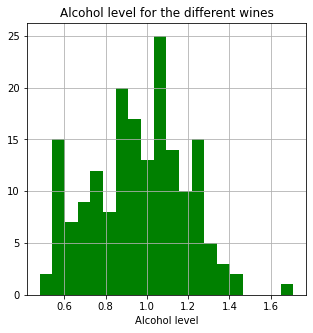

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Alcohol level for the different wines")
plt.xlabel("Alcohol level")
wine_df['Hue'].hist(bins=20, color="green")
plt.show()

It is going to be inefficient and computationally expensive to re-code multiple times to plot histograms for the remaining tweleve features.  

In such a scenario, we could either use for or while loops make it more effective.

However, there are built in functions in the seaborn package that can plot all the histograms using a single line of code.

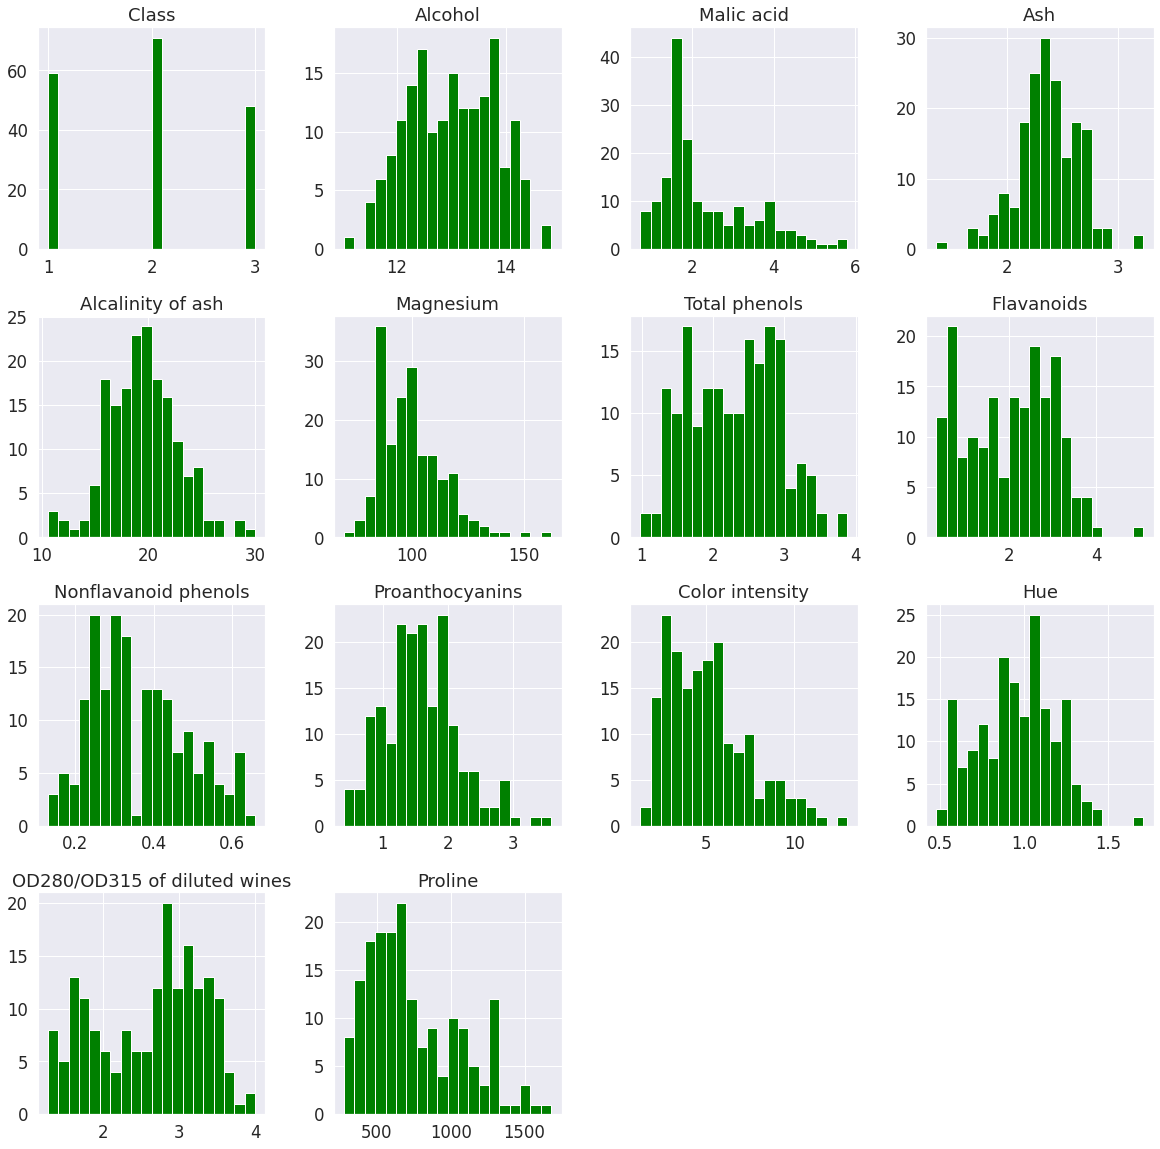

In [ ]:
sns.set(style="darkgrid", font_scale=1.5, rc={'figure.figsize':(20,20)})
ax=wine_df.hist(bins=20, color="green")
plt.show()

<b> Boxplot </b>
<br>Another form a visualisation that can be used to display the data distribution is through a boxplot.

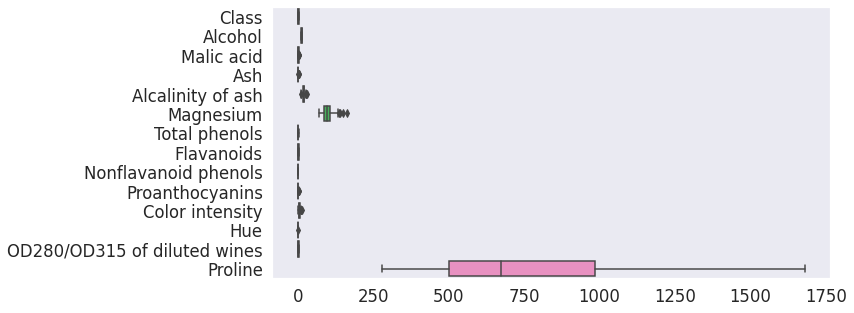

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style("dark")
sns.boxplot(data=wine_df, orient="h")
plt.show()

<b> Do you like these boxplots? What is wrong with this visualisation?? </b>

Since the variables have a different range (confirmed through descriptive statistics), the scales of the subplots have to diferent. Thus, all the subplots are using the highest range. As such, the distribution of the other subplots (with much smaller range) are displayed with a horizontal line.     

Can you try to change the visualisation to have seperate box plots for each feature?  

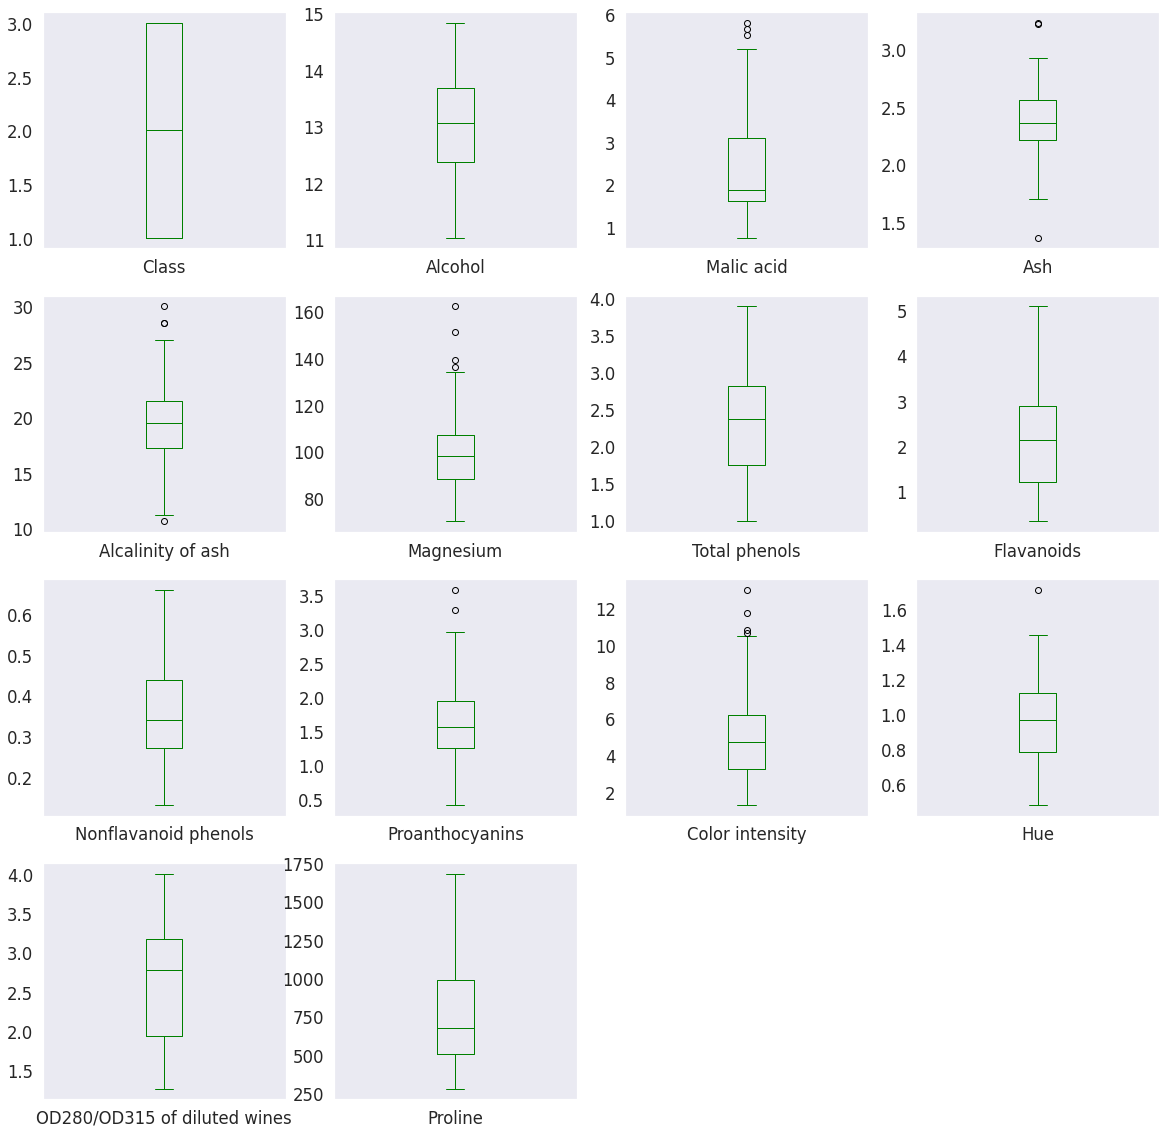

In [ ]:
wine_df.plot(kind='box', subplots=True,sharex=False, color='green', layout=(4,4))
plt.show()

Sometimes we want to inspect the relationship between two variables. We use scatter plot to investigate the tend between two numerical variables.
</br>This can be done through formal statistical analysis (correlation analysis) which we will cover in Week 2.

We look at the pairwise relationship using pairwise scatter plot as shown below.

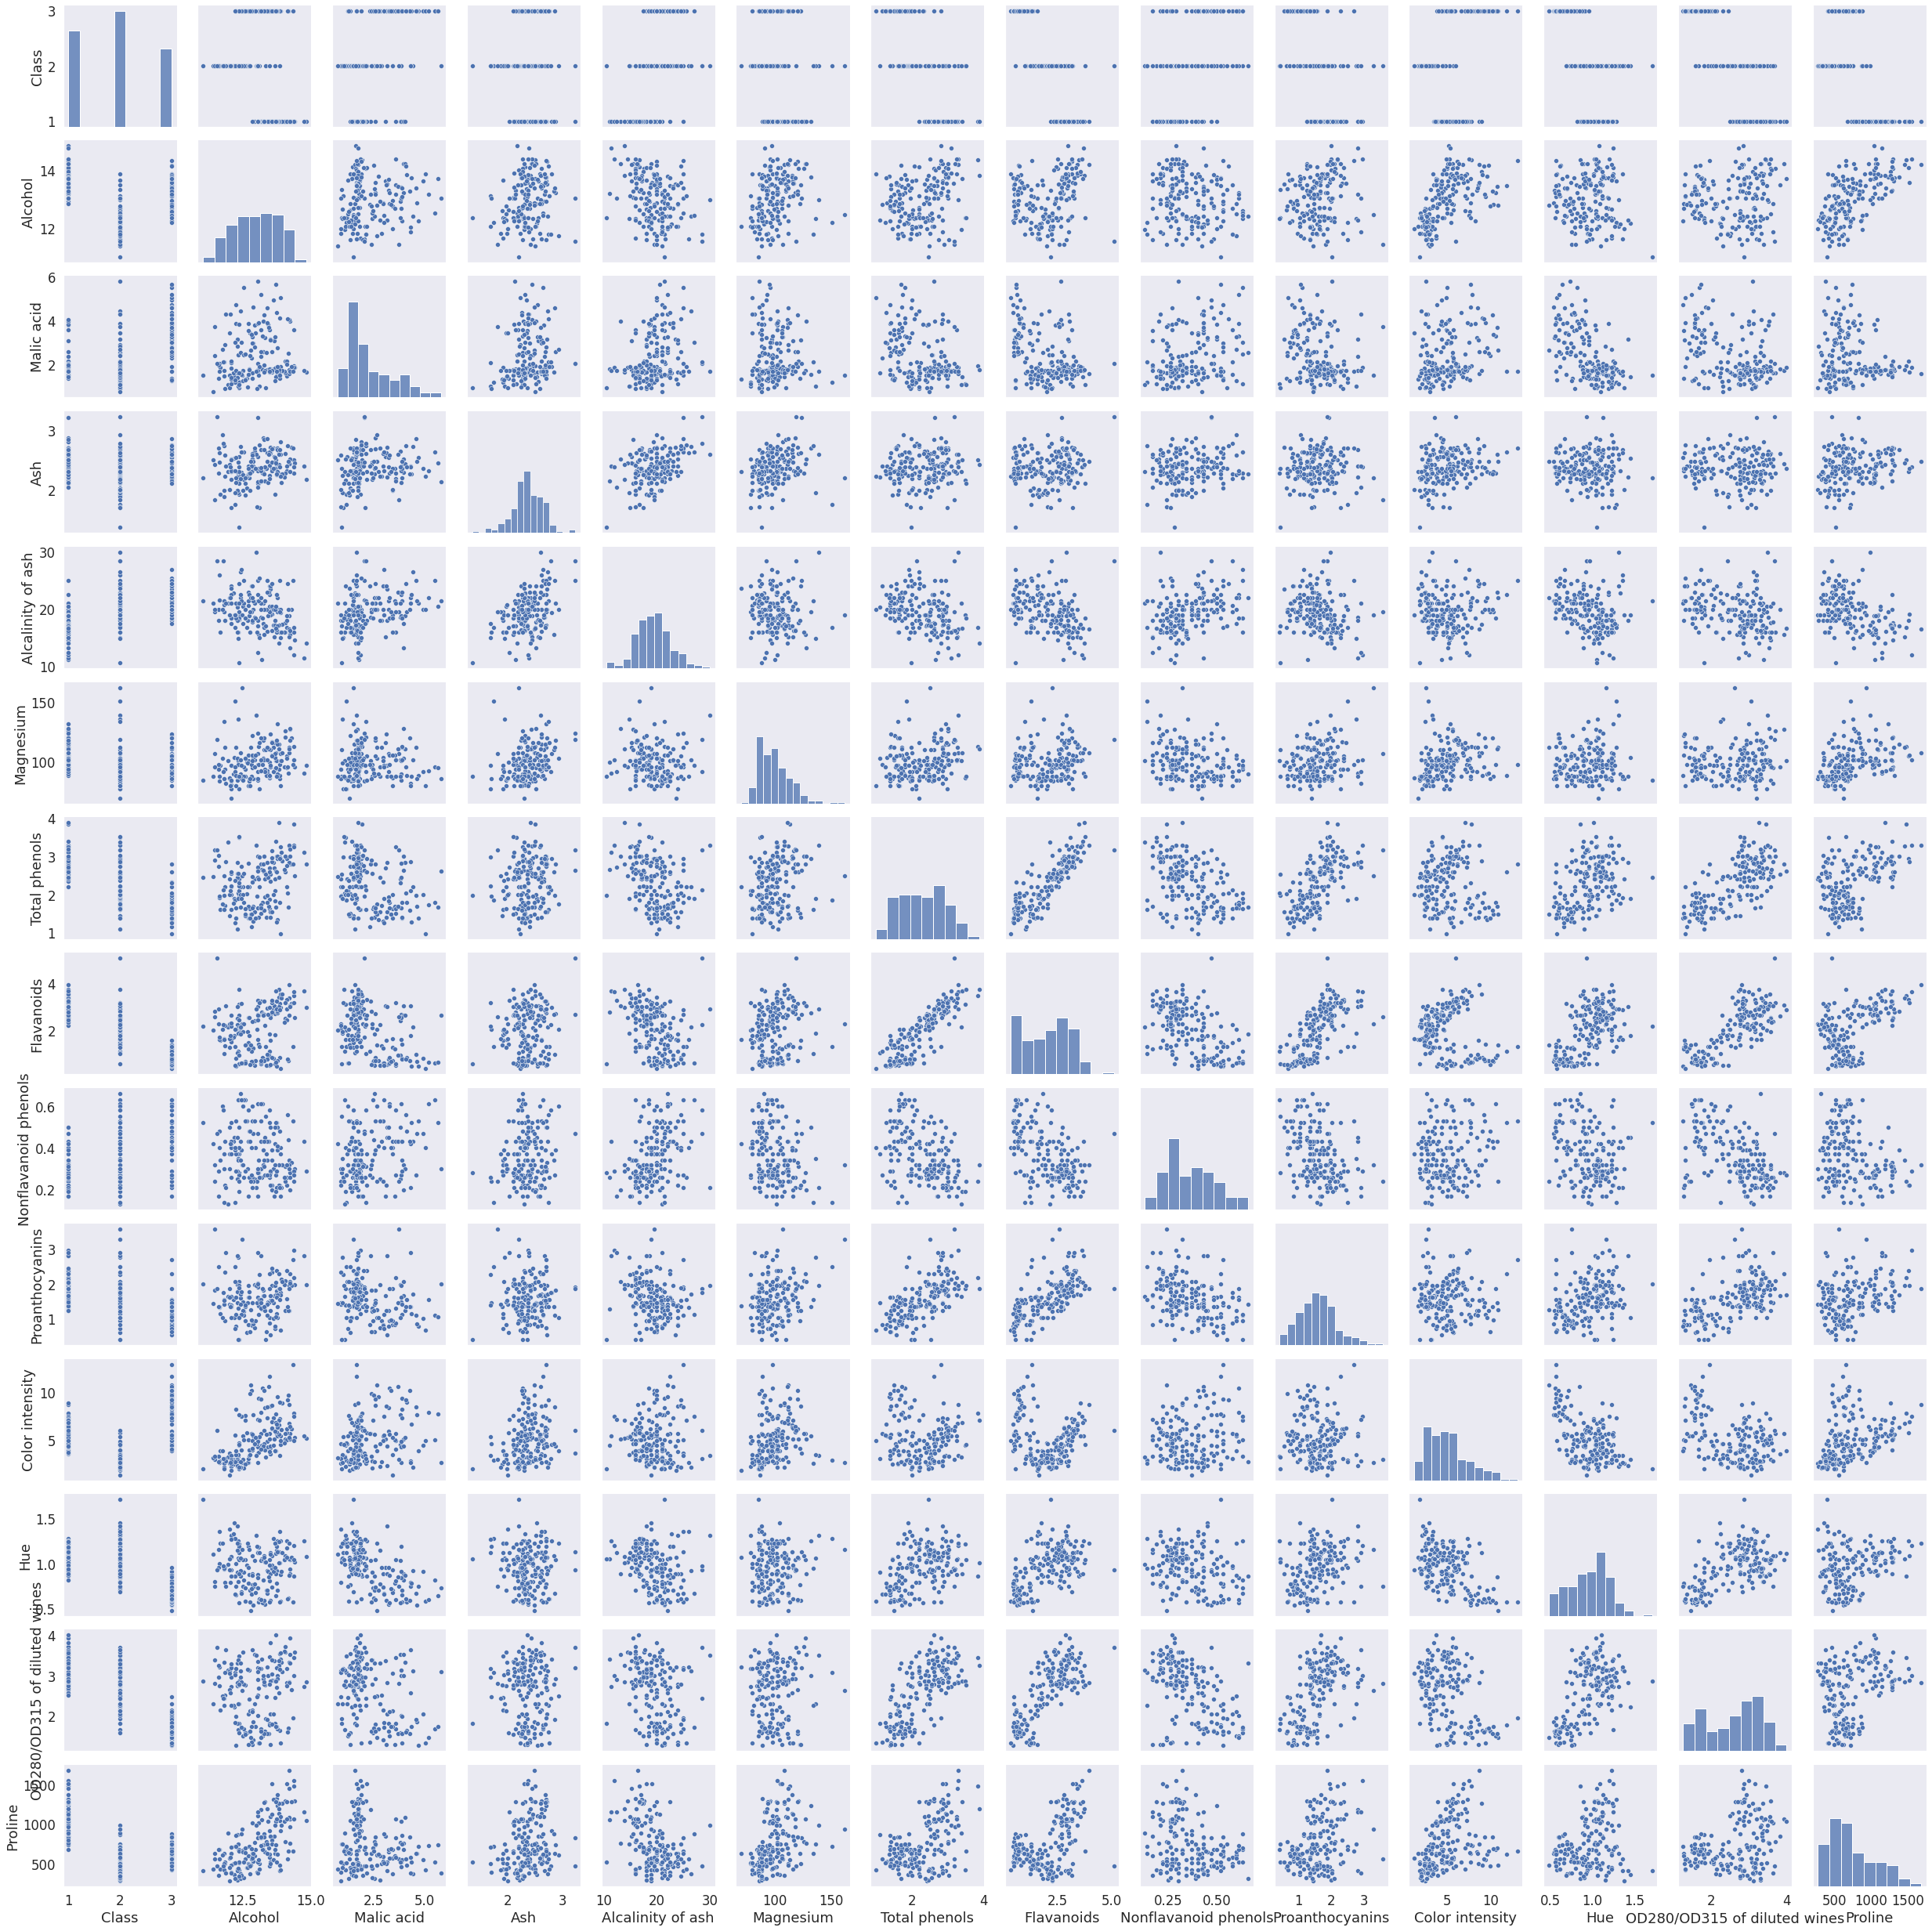

In [ ]:
sns.pairplot(wine_df,palette="light")
plt.show()

This visualisation provides a scatter plot grid representing pairwise relationships. However, this can be drilled down to see inidividual relationship or group of smaller variables.

The following visualisation shows a scatter plot grid between three variables

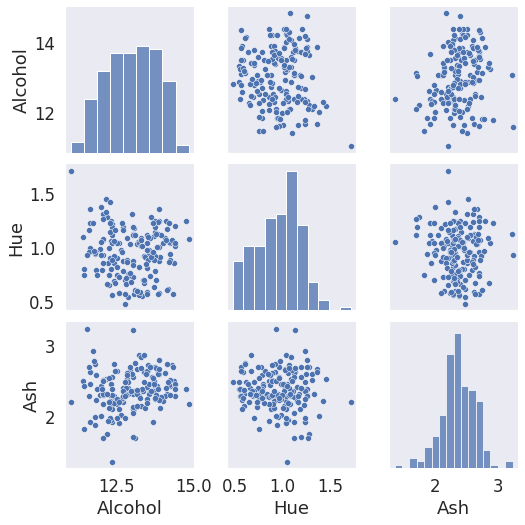

In [ ]:
sns.pairplot(wine_df[['Alcohol','Hue','Ash']],palette="light")
plt.show()

More formal statistical analysis to infer about the relationship of numerical variables will be discussed in the next week.